# Tobig's 15기 2주차 Optimization 과제 이성범

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


In [3]:
data.describe()

,Label,bias,experience,salary
count,200.000000,200.0,200.000000,200.000000
mean,0.260000,1.0,4.998000,66700.000000
std,0.439735,0.0,2.847373,15536.955459
min,0.000000,1.0,0.100000,30000.000000
25%,0.000000,1.0,2.500000,56000.000000
50%,0.000000,1.0,5.100000,65000.000000
75%,1.000000,1.0,7.425000,77250.000000
max,1.000000,1.0,10.000000,107000.000000


data의 experience와 salary의 단위, 평균, 분산이 크게 차이가 난다는 것을 확인할 수 있다.

## Train Test 데이터 나누기

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

위 함수는 데이터를 학습용 데이터와 테스용 데이터로 나누는 함수이다. 함수 속의 매개변수를 살펴보면 data.iloc[:, 1:]는 Label을 제외한 모든 독립변수의 데이터를 의미하고 data.iloc[:, 0]는 Label 데이터 즉 종속변수의 모든 데이터를 의미한다. 데이터를 test_size = 0.25를 통해서 train date를 75%로 test date를 25%로 나누었다. 그리고 random_state = 0 으로 설정함으로써 데이터 분활의 기준을 명시하여 언제 어디든 random_state가 동일하다면 seed 값이 같기 때문에 일정한 데이터가 나눠진다. 밑의 결과를 보면 독립변수의 train date를 의미하는 X_train과 종속변수의 train data를 의미하는 y_train이 75%의 비율을 가지고 나머지 test date들이 25%의 비율로 나누어진 것을 확인할 수 있다.

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


In [8]:
X_train.describe()

,bias,experience,salary
count,150.0,1.500000e+02,1.500000e+02
mean,1.0,-7.845576e-17,-1.709743e-16
std,0.0,1.003350e+00,1.003350e+00
min,1.0,-1.664908e+00,-2.330644e+00
25%,1.0,-8.453999e-01,-6.816035e-01
50%,1.0,9.739083e-03,-8.794884e-02
75%,1.0,7.847088e-01,7.035907e-01
max,1.0,1.862540e+00,2.748401e+00


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [9]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


sklearn의 StandardScaler를 통해서 데이터를 평균이 0, 분산을 1로 만드는 표준화를 해주었다. 여기서 중요한 점은 train date를 기준으로 표준화를 진행해주고 그 기준을 동일하게 test data에도 적용해줘야 한다는 것이다.

bias의 경우에는 절편을 구하기 위한 변수이므로 따로 표준화를 해주지 않았고 experience와 salary의 경우에는 단위, 평균, 분산의 차이가 크게 나기 때문에 표준화를 진행해주었다.

In [10]:
# parameter 개수
N = len(X_train.loc[0])

In [11]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.98902634, 0.94125085, 0.3603655 ])

train data의 독립변수의 수 만큼 parameter를 임의로 설정해주었다. 추후에 학습을 통해서 최적의 parameter로 수정이 된다.

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [12]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i] * parameters[i]
    return z

위 함수는 Logistic Function의 자연상수 e의 지수 부분에 음수 부호를 제외한 값을 구하는 함수이다.

## Logistic Function

## $p = \frac{1}{1 + e^{-x_{i}\theta}}$

In [13]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1 / (1 + np.exp(-z)) 
    return p

In [14]:
logistic(X_train.iloc[1], parameters)

0.8929063534961731

위 함수는 Logistic Function을 구현한 함수이다.

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = - \Sigma(y_{i}\log p(X_{i}) + (1 - y_{i}) \log(1 - p(X_{i}))) $ 

In [15]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = (y * np.log(p) + (1 - y) * np.log(1-p))
    return -loss

In [16]:
def mse_i(X, y, parameters):
    y_hat = np.dot(X, parameters.T)
    loss = ((y - y_hat)**2) / 2
    return loss

In [17]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss / n #loss 평균값으로 계산
    return loss

In [18]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.4261331764670764

In [19]:
batch_loss(X_test, y_test, parameters, mse_i, len(X_test))

1.5886789270647308

위 함수들은 각각 로지스틱 회귀와 선형 회귀의 목적 함수를 구현한 함수로 minus_log_cross_entropy_i와 mse_i는 각각의 데이터 셋에 대한 목적 함수 즉 시그마의 안쪽 부분을 의미하고 batch_loss를 통해서 시그마를 시행함으로써 전체의 목적 함수의 평균을 구한다.

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=$ $ -\Sigma(y_{i} - \theta^{T}X_{i})X_{ij} $
## ${\partial\over{\partial \theta_j}}l(p)=$ $ -\Sigma(y_{i} - p_{i})X_{ij} $

In [20]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = np.dot(X, parameters.T)
        gradient = (y - y_hat) * X[j]
    else:
        p = logistic(X, parameters)
        gradient = (y - p) * X[j]
    return -gradient

In [21]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.06012207062664357

In [22]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'linear')

-0.046247549614105814

위 함수는 하나의 데이터 셋에 대한 목적 함수의 Gradient를 구하는 함수로 추후에 하나의 배치 데이터에 대한 전체의 Gradient를 구하고 구해진 Gradient를 바탕으로 parameter를 수정하는 과정을 거친다. 

따라서 위 함수는 제일 처음으로 시행되는 Gradient를 구하는 함수로 볼 수 있다.

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [23]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

In [24]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'linear')
gradients1

[106.35395138650736, 163.23244052082586, 172.9130092877868]

In [25]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[59.381724202106604, 13.493115274583142, 41.11395676699722]

위 함수는 하나의 배치 데이터에 대한 전체 Gradient를 구하는 함수이다 추후에 이 함수를 통해서 구해진 Gradient를 바탕으로 parameter를 수정한다.

## mini-batch
인덱스로 미니 배치 나누기

In [26]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

In [27]:
batch_idx(X_train, 15)

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
 array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]),
 array([75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]),
 array([ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104]),
 array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119]),
 array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134]),
 array([135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
        148, 149])]

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  


**설명: batch_size가 1이면 한번 학습때 전체데이터 중 임의의 1개의 데이터만 학습을 한다. batch_size가 X_train의 크기 만큼 들어오면(whole) 한번 학습할때 전체 데이터가 활용된다. batch_size가 k이면 전체데이터의 수 / k 개 만큼의 데이터셋이 만들어지고 한번 학습할 때 k개의 데이터가 활용된다.(ex: batch_size = 15, X_train의 크기 150 -> 데이터셋 하나에 15개씩 총 10개의 데이터 셋이 만들어진다.) 따라서 batch_size는 한번 학습을 할 때 활용되는 데이터의 크기를 의미하며 batch_size가 커지면 한번 학습때 활용되는 데이터셋의 크기 커지고 반대로 batch_size가 작아지면 한번 학습때 활용되는 데이터셋의 크기가 작아지지만 데이터셋의 개수는 많아진다고 볼 수 있다.**

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [28]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n
    
    parameters -= gradients
    return parameters

In [29]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.98506756, 0.94035131, 0.35762456])

위 함수는 구해진 Gradient를 바탕으로 설정한 학습률로 Gradient를 조정하고 조정된 Gradient를 바탕으로 parameter를 수정하는 함수이다.

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 현재 반복 횟수  
- num_epoch: 총 학습 횟수
<br>

BGD: 학습 한 번에 모든 데이터셋에 대해 기울기를 구하는 방식  
SGD: 학습 한 번에 임의의 1개 데이터에 대해서만 기울기를 구하는 방식  
MGD: 학습 한 번에 데이터셋의 일부에 대해서만 기울기를 구하는 방식  
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD  
batch_size=k -> MGD  
batch_size=whole -> BGD  

In [30]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    
    # 우선 train data의 독립변수의 수 만큼의 랜럼한 파라미터를 구한다.
    parameters = np.random.rand(N)
    
    # 로지스틱 회귀라면 목적함수로 minus_log_cross_entropy_i를 사용하고 선형이라면 mse_i를 사용한다.
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    
    # 초기의 손실함수를 아주 큰 값으로 설정한다.
    loss = 999
    
    # 배치 사이즈에 맞는 데이터 셋을 구한다.
    batch_idx_list = batch_idx(X_train, batch_size)
    
    # num_epoch만큼의 학습을 시행한다.
    for epoch in range(num_epoch):
        if stopper:
            break
        # 한번 학습때 사용할 데이터 셋을 구한다.
        for idx in batch_idx_list:
            # 한번 학습때 사용하는 X와 y 데이터
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            # 현재 학습에 활용되는 데이터의 gradient를 구한다.
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            # 구한 gradient를 바탕으로 parameter를 수정한다.
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            # 수정된 parameter를 바탕으로 새로운 손실 함수를 구한다.
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            # 중단 조건
            # 새로운 손실 함수와 기존 손실함 수의 차이가 우리가 처음에 설정한 tolerance보다 작다면 학습을 중단한다.
            # 왜냐하면 현재 데이터에 대하여 이미 충분이 학습이 완료된 상태이기 때문에 더이상 학습할 의미가 없기 때문이다.
            # 따라서 빠르게 학습을 종료시키고 싶다면 tolerance를 높게 설정하면 된다.
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            # 아니라면 손실 함수를 최신의 제일 작은 손실함수로 변경해준다.
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

기본적으로 batch_size와 learning_rate는 서로 연관성이 있는데 batch_size를 증가시키면 learning_rate를 감소시키는 것과 동일하다. 왜냐하면 learning_rate를 보폭이라고 가정했을 때 batch_size가 1이라면 그 보폭의 너비가 넓어지기 때문이다. 그런데 기본적으로 학습을 할 때 적절한 learning_rate를 설정한 후 batch_size를 증가시키는 것이 더 속도와 시간면에서 우세하다. 왜냐하면 GPU가 허락해주는 상태에서 batch_size가 증가하면 병렬처리가 가능해지기 때문에 속도가 매우 빨라지게 된다. 따라서 현재 GPU 메모리를 사용한다는 가정하에 learning_rate를 고정 시킨 후에 학습을 시행하겠다.

In [31]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size = X_train.shape[0])
new_param_bgd

epoch: 0  loss: 0.9744523042062239  params: [0.20844996 0.87521874 0.81691977]  gradients: [0.025091630632523305, 0.015483397109418576, 0.03567683054201537]
epoch: 100  loss: 0.45168997477459216  params: [-0.85001714  0.89142311 -0.78351723]  gradients: [0.003268334484554982, -0.005770986649146818, 0.006927938213703697]
epoch: 200  loss: 0.39148163607836073  params: [-1.0409064   1.40775461 -1.32261468]  gradients: [0.0012325363356552258, -0.004448599411998937, 0.004385551285834795]
epoch: 300  loss: 0.36126950972304944  params: [-1.14239649  1.79304551 -1.69900961]  gradients: [0.0008713397498742896, -0.0033518984272063604, 0.0032545424028703565]
epoch: 400  loss: 0.3434939787200463  params: [-1.22094882  2.09019547 -1.9865181 ]  gradients: [0.0007139898492260371, -0.0026463094853723256, 0.0025518972091801866]
epoch: 500  loss: 0.33205466933748456  params: [-1.28657669  2.32904296 -2.21622085]  gradients: [0.0006046747421218103, -0.0021633276416764364, 0.002074965505902751]
epoch: 600

array([-1.50277372,  3.07277186, -2.92358547])

위 함수는 BGD 방식으로 학습한 방식이다. 한번 학습을 할 때 전체 데이터를 활용하기 때문에 GPU를 통한 병렬처리가 가능해 속도가 빨라질 수 있지만 지역최적화에 빠질 수 있고 한번에 학습할 데이터가 많다면 메모리 부족을 초래할 수 있다. 따라서 위의 결과를 조금 더 향상시키기 위해서는 num_epoch을 증가시키거나 learning_rate를 조정해야 한다.

In [32]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size = 1)
new_param_sgd

epoch: 0  loss: 0.2804585622681409  params: [-0.87545835  1.00797207 -1.13831202]  gradients: [0.02530328913964999, 0.013770074151586105, 0.017803159975482513]
epoch: 100  loss: 0.07736675122670648  params: [-1.93032529  4.17501837 -4.0676901 ]  gradients: [0.0075385468772539614, 0.004102484420981123, 0.005304051789382623]
epoch: 200  loss: 0.07736266552467355  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.007538159522101871, 0.004102273621936862, 0.005303779249883829]
epoch: 300  loss: 0.07736266518361752  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767166, 0.004102273604340285, 0.005303779227133429]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  loss: 0

array([-1.9303681 ,  4.17514311, -4.06780375])

위 함수는 SGD 방식으로 학습한 방식이다. 한번 학습을 할 때 하나의 데이터를 활용하기 때문에 GPU를 통한 병렬처리가 불가능해 속도가 느려질 수 있지만 지역 최적화에 빠질 우려가 BGD 방식보다 적다. 또한 현재의 결과를 본다면 SGD 방식이 가장 손실 함수가 작다. 또한 위의 결과를 조금 더 향상시키기 위해서는 num_epoch을 증가시키거나 learning_rate를 조정해야 한다.

In [33]:
new_param_mgd = gradient_descent(X_train, y_train, batch_size = 32)
new_param_mgd

epoch: 0  loss: 0.9559790706954762  params: [0.44860117 0.76010021 0.11988639]  gradients: [0.03410176553247528, 0.02244423959357499, 0.04499452505682031]
epoch: 100  loss: 0.34024053368876184  params: [-1.31155421  2.3831293  -2.28755375]  gradients: [0.002412065411844299, 0.00026712735708521766, 0.004696186333428254]
epoch: 200  loss: 0.3135325344481077  params: [-1.53462503  3.10304936 -2.96716149]  gradients: [0.003916781425186294, 0.000795808669185999, 0.0023515954769118383]
epoch: 300  loss: 0.30499126756627376  params: [-1.66019931  3.49181912 -3.33012381]  gradients: [0.004695231160304265, 0.0010613300483325915, 0.0013824005775381063]
epoch: 400  loss: 0.30133927415605527  params: [-1.73888801  3.7319502  -3.55291134]  gradients: [0.005158311928961358, 0.0012155456844228493, 0.0008621362374018232]
epoch: 500  loss: 0.2995277785712271  params: [-1.7910409   3.88997378 -3.69894905]  gradients: [0.005454525056881644, 0.0013124453422378446, 0.0005476332659179265]
epoch: 600  loss: 

array([-1.8826989 ,  4.18986868, -3.9714308 ])

위 함수는 MGD 방식으로 학습한 방식이다. 한번 학습을 할 때 32개의 데이터를 활용하기 때문에 GPU를 통한 병렬처리가 가능해 SGD보다는 빠르고 BGD 보다는 속도가 느린 방식이다. 하지만 BGD 보다 지역 최적화에 빠질 우려가 적다. 또한 현재의 결과를 본다면 2번째로 작은 손실 함수를 보여준다. 또한 위의 결과를 조금 더 향상시키기 위해서는 num_epoch을 증가시키거나 learning_rate를 조정해야 한다. 대부분의 학습시에는 데이터의 셋에 따라 달라지겠지만 기본적으로 적절한 learning_rate와 batch_size를 설정한 MGD방식을 많이 활용한다.

### Predict Label

In [66]:
# new_param_bgd를 활용한 에측
y_predict_bgd = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p > 0.5 :
        y_predict_bgd.append(1)
    else :
        y_predict_bgd.append(0)

# new_param_sgd를 활용한 예측
y_predict_sgd = []
y_predict_proba_c1_sgd = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_sgd)
    y_predict_proba_c1_sgd.append(p)
    if p > 0.5 :
        y_predict_sgd.append(1)
    else :
        y_predict_sgd.append(0)

# new_param_mgd를 활용한 예측
y_predict_mgd = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_mgd)
    if p > 0.5 :
        y_predict_mgd.append(1)
    else :
        y_predict_mgd.append(0)

# 초기 설정된 random_parameters를 활용한 예측
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

위 함수는 임계치 0.5를 기준으로 로지스틱 함수로 예측한 확률 값을 0과 1로 구분한 코드이다.

### Confusion Matrix

In [67]:
from sklearn.metrics import *

# Confusion Matrix을 함수로 구현
def get_clf_eval(y_test, y_predict, title):
    tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
    print("-"*90)
    print(f'{title}의 Confusion Matrix')
    print(confusion_matrix(y_test, y_predict))
    accuracy = (tp+tn) / (tp+fn+fp+tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    print(f'{title}의 accuracy : {accuracy:.5f}, precision : {precision:.5f}, recall : {recall:.5f}, f1 : {f1:.5f}')
    print("-"*90)
    print()

In [68]:
get_clf_eval(y_test, y_predict_bgd, 'y_predict_bgd')

get_clf_eval(y_test, y_predict_sgd, 'y_predict_sgd')

get_clf_eval(y_test, y_predict_mgd, 'y_predict_mgd')

get_clf_eval(y_test, y_predict_random, 'y_predict_random')

------------------------------------------------------------------------------------------
y_predict_bgd의 Confusion Matrix
[[38  2]
 [ 4  6]]
y_predict_bgd의 accuracy : 0.88000, precision : 0.75000, recall : 0.60000, f1 : 0.66667
------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------
y_predict_sgd의 Confusion Matrix
[[38  2]
 [ 1  9]]
y_predict_sgd의 accuracy : 0.94000, precision : 0.81818, recall : 0.90000, f1 : 0.85714
------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------
y_predict_mgd의 Confusion Matrix
[[38  2]
 [ 1  9]]
y_predict_mgd의 accuracy : 0.94000, precision : 0.81818, recall : 0.90000, f1 : 0.85714
------------------------------------------------------------------------------------------

-------------------------------------

In [81]:
print('전체 데이터의 개수: ', y_test.count())
print("0의 개수          : ",sum(y_test == 0))
print("1의 개수          : ",sum(y_test == 1))

전체 데이터의 개수:  50
0의 개수          :  40
1의 개수          :  10


위 코드는 임계치 0.5를 기준으로 예측한 값에 대한 Confusion Matrix, accuracy, precision, recall, f1_score을 구한 코드이다. 현재 test 데이터의 라벨이 8:2의 비율을 가지고 있기 때문에 많은 불균형한 상태이다. 따라서 모든 값을 0으로 예측해도 80%의 정확도를 보이기 때문에 정확도는 그렇게 좋은 모델 성능 평가지표가 될 수 없다. 따라서 정밀도, 재현율, F1_score의 지표가 더 좋은 모델 성능 평가 지표로 보인다. 지표에 따르면 SGD방식과 MGD방식으로 학습한 데이터가 성능이 더 좋다고 볼 수 있지만 학습횟수가 모두 고정된 상태이기 때문에 학습횟수 등 여러 파라미터가 달라진다면 언제든 성능은 달라질 수 있다.

### 정밀도와 재현율과 F1스코어의 관계

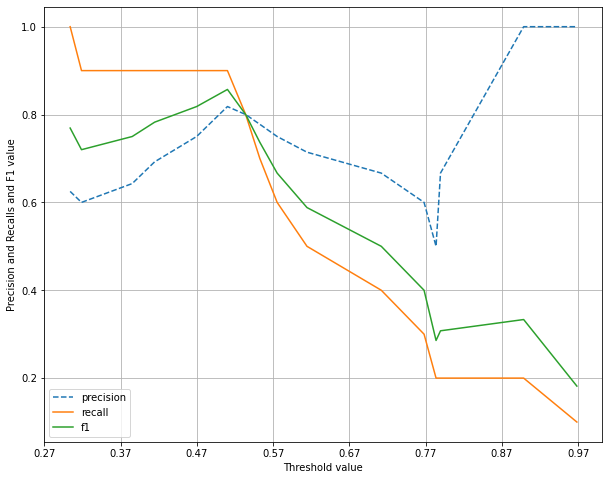

In [70]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib as mpl

# 정밀도와 재현율과 F1스코어을 그래프화 시키기 위한 함수
def precision_recall_curve_plot_and_f1(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    f1 = 2 * (precisions * recalls) / (precisions + recalls)

    plt.figure(figsize=(10,8))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    plt.plot(thresholds, f1[0:threshold_boundary], linestyle='-', label='f1')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recalls and F1 value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot_and_f1(y_test, y_predict_proba_c1_sgd)

기본적으로 정밀도와 재현율은 trade-off 관계를 가지는데 정밀도가 상승하면 재현율은 감소하고 정밀도가 증가하면 재현율은 감소하는 관계를 가진다. F1_score의 경우에는 정밀도와 재현율이 가장 엇비슷할때 그 값이 가장 높아진다. 따라서 정밀도와 재현율의 관계를 고려해 성능을 평가하는 지표가 F1_Score임을 알 수 있다.

그런데 정밀도와 재현율이 trade-off관계를 가지는 이유가 무엇일까? 그 이유는 정밀도와 재현율을 구하는 식의 분모를 보면 알 수 있다. 정밀도의 경우 FP를 가지고 있고 재현율의 경우 FN을 가지고 있다. 따라서 임계치를 높여서 모든 값을 N으로 예측한다면 FN값이 증가하고 FP값이 감소하여 정밀도는 증가하고 재현율은 감소할 것이다. 이렇게 임계치를 높이면 정밀도는 증가하고 재현율은 감소하게 된다. 따라서 가장 좋은 성능을 가지는 지표는 정밀도, 재현율, F1 값이 모두 높은 모델이며 이러한 정밀도와 재현율의 trade-off 관계 속에 정밀도와 재현율의 성능을 모두 높이는 방법은 모델 자체의 성능을 좋게 만들어 그래프를 위의 방향으로 끌어 올리는 것이다. 

### ROC curve and AUC Score

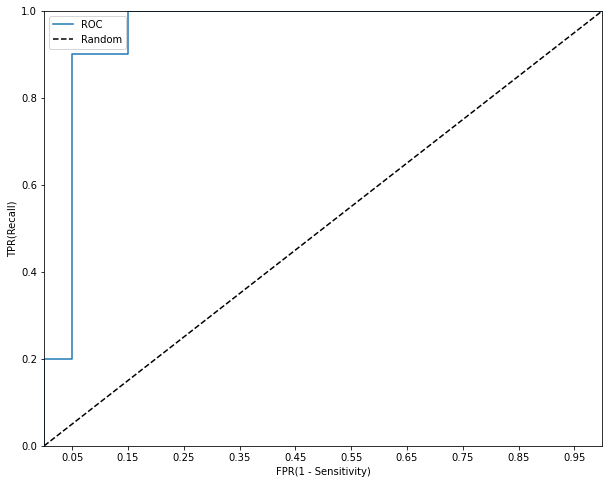

In [38]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib as mpl

# ROC curve and AUC Score를 그래프로 나타내기 위한 함수
def roc_curve_plot(y_test, pred_proba_c1):
    FPRs, TPRs, thresholds = roc_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(10,8))
    # ROC 곡선을 그림
    plt.plot(FPRs, TPRs, label='ROC')
    # 가운데 대각선을 그림
    plt.plot([0,1], [0,1], 'k--', label = 'Random')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, y_predict_proba_c1_sgd)

In [85]:
auc = roc_auc_score(y_test, y_predict_proba_c1_sgd)
print(f'AUC Score : {auc:.5f}')

AUC Score : 0.95000


위 코드는 ROC curve와 AUC Score를 나타낸 것으로 ROC curve는 FPR이 변할 때 TPR이 어떻게 변화하는지를 나타낸 곡선으로 ROC curve의 밑의 면적의 넓이의 값이 AUC Score이며 그 값이 1에 가까울수록 성능이 좋다고 할 수 있다. 현재 SGD방식으로 구한 값의 AUC 값은 0.95로 성능이 좋다고 할 수 있다.

주의할 점
- ROC curve와 AUC Score를 구할때는 예측 값이 아닌 label에 대한 예측 확률 값을 활용해야한다.

## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [39]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [40]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [41]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.22684876, 3.21363208])

In [42]:
#경사하강법
new_param = gradient_descent(X, y, model = 'linear')
new_param

epoch: 0  loss: 0.24953123770073612  params: [1.12096436 0.83876629]  gradients: [-0.05858469161478886, -0.03661187553203282]
epoch: 100  loss: 0.12562870942931403  params: [0.27718921 3.15911792]  gradients: [-0.0259519345661178, -0.006339944357961638]


array([0.25282692, 3.14789906])

In [43]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

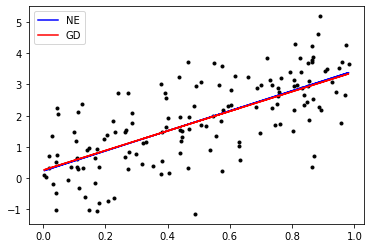

In [44]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()

정규 방정식으로 구한 회귀선과 경사 하강법을 통해 구한 회귀선 모두 동일한 형태를 보여주며 대체적으로 값을 잘 예측했다고 볼 수 있다.

참고자료

- 파이썬 머신러닝 완벽 가이드(권철민)
- 핸즈온 머신러닝 2판(박해선)
- https://honeyjamtech.tistory.com/43
- https://light-tree.tistory.com/133